In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb/reviews.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
reviewsDF = pd.read_csv("../input/airbnb/reviews.csv")
reviewsDF = reviewsDF.dropna()
reviewsDF.head()
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=f5edc6bc99295c523ef2b4eb4fd709daa282b10b7b43230ba1a0e2822e20db9f
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


**Assigning polarity score to each comment and adding the same to dataframe**
to retrieve the polarity of comments , whether a comment is postive or negative or neutral, we are using built in analyzer in NLTK oyhton libarary to assign polarity score to each comment 

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

reviewsDF['polarity_value']="Default"
reviewsDF['neg']=0.0
reviewsDF['pos']=0.0
reviewsDF['neu']=0.0
reviewsDF['compound']=0.0
for index, row in reviewsDF.iterrows():
    ss = sid.polarity_scores(row['comments'])
    reviewsDF.at[index,'polarity_value'] = ss
    reviewsDF.at[index,'neg'] = ss['neg']
    reviewsDF.at[index,'pos'] = ss['pos']
    reviewsDF.at[index,'neu'] = ss['neu']
    reviewsDF.at[index,'compound'] = ss['compound']
reviewsDF.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,958,5977,2009-07-23,15695,Ted,"Our experience was, without a doubt, a five st...","{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...",0.000,0.212,0.788,0.9590
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.000,0.303,0.697,0.9819
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,"{'neg': 0.134, 'neu': 0.71, 'pos': 0.156, 'com...",0.134,0.156,0.710,0.7600
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,"{'neg': 0.035, 'neu': 0.646, 'pos': 0.319, 'co...",0.035,0.319,0.646,0.9840
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,"{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'comp...",0.000,0.387,0.613,0.9617


In [5]:
reviewsDF.to_csv('./polarity_values_reviws.csv')

As a pre processing step, I removed the comments which are not in english because I used built in analyzir in NLTK to assing polarity score to each comment and this anlyzer doesnt interpret other than english.

In [6]:
# Dataframe consists of reviews in different languange . Hence removing the comment which are not in english


from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index, row in reviewsDF.iterrows():
    lang=detect_lang(row['comments'])
    reviewsDF.at[index, 'language'] = lang
#        print(lang)

#tking rows whose langusnge is english
EngReviewsDF=reviewsDF[reviewsDF.language=='en']

EngReviewsDF.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound,language
0,958,5977,2009-07-23,15695,Ted,"Our experience was, without a doubt, a five st...","{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...",0.0,0.212,0.788,0.9590,en
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.0,0.303,0.697,0.9819,en


**Visualizing the polarity score for positiviy**

In [7]:
polarDF=EngReviewsDF[['pos']]
polarDF=polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0,1.1,0.1))).count()
polarDF=polarDF.rename(columns={'pos':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'pos':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace
(',',''))
    polarDF.at[i,'Sentiment'] = 'positive'
del polarDF['range_i']
polarDF.head()

,count_of_Comments,RANGE,Sentiment
0,3925,0.0,positive
1,31206,0.1,positive
2,68834,0.2,positive
3,63257,0.3,positive
4,34889,0.4,positive


**Visualizing polarity score for Negativity**

In [8]:
polarDFneg=EngReviewsDF[['neg']]
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0,1.1,0.1))).count()
polarDFneg=polarDFneg.rename(columns={'neg':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'neg':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDF.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace
(',',''))
    polarDF.at[i,'Sentiment'] = 'negative'
del polarDFneg['range_i']
for i, r in polarDFneg.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[0],r[0]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneg.head()

,count_of_Comments
0,56652
1,4097
2,484
3,116
4,48


**visualizing polarity score for neutrality**

In [9]:
polarDFneut=EngReviewsDF[['neu']]
polarDFneut=polarDFneut.groupby(pd.cut(polarDFneut["neu"], np.arange(0,1.1,0.1))).count()
polarDFneut=polarDFneut.rename(columns={'neu':'count_of_Comments'})
polarDFneut=polarDFneut.reset_index()
polarDFneut=polarDFneut.rename(columns={'neu':'range_i'})
for i,r in polarDFneut.iterrows():
    polarDF.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace
(',',''))
    polarDF.at[i,'Sentiment'] = 'neutral'
del polarDFneut['range_i']
for i, r in polarDFneut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[-1],r[-1]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneut.head()

,count_of_Comments
0,60
1,1996
2,4152
3,8001
4,17746


**Plotting the number of comments againts the polarity range**

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x1440 with 0 Axes>

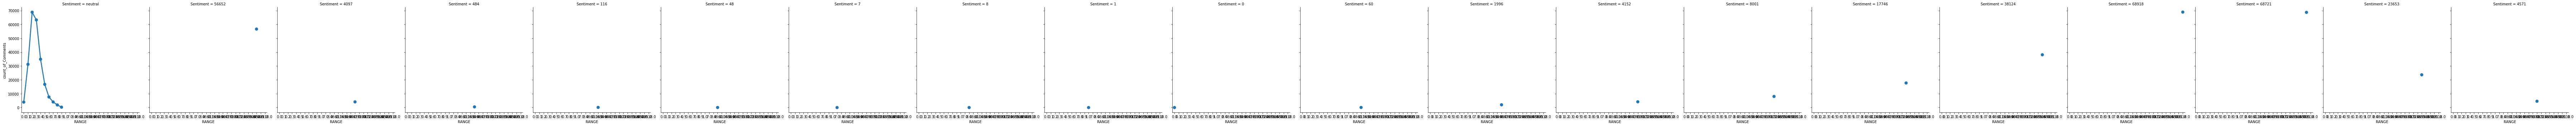

In [10]:
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments", col="Sentiment")

**Analyzig the most used words in the comments **

In [11]:
from nltk.corpus import stopwords
import string
import nltk

words=''
for index, row in EngReviewsDF.iterrows():
    words += row['comments']

In [12]:
reviews_data=nltk.word_tokenize(words)
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s",'1',',',]
nums=['0','1','2','3','4','5','6','7','8','9']

In [13]:
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")
cachedStopWords.append('the')

words_only = [''.join(c for c in s if c not in string.punctuation if c not in nums if c not in ignoreChar) for s in reviews_data]
words_only = [s for s in words_only if s]
comments_filtered_data=' '.join(words_only)
comments_filtered_data = ' '.join([word.lower() for word in comments_filtered_data.split() if word not in cachedStopWords])

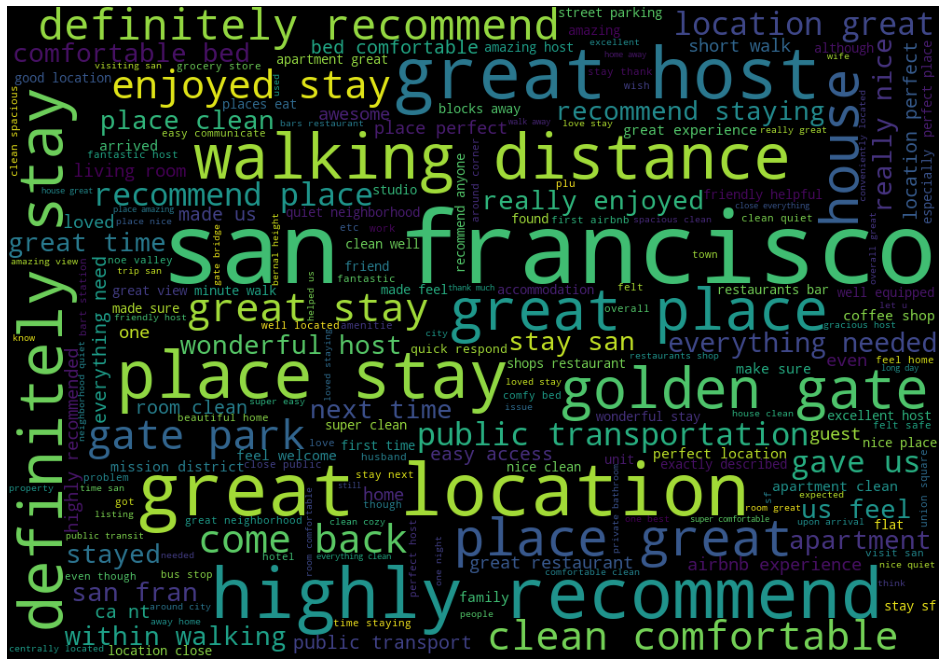

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(comments_filtered_data)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


**The words like great location, great host and definetely stay were most used by the customer. These review and comments play a  big role in  attracking the attention of travelers**